<a href="https://colab.research.google.com/github/sumayabai/Rented-Bike-sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project_ipynb(Sumaya_Bai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/Capstone2/SeoulBikeData.csv',encoding= 'unicode_escape')


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.drop('Dew point temperature(°C)',axis =1,inplace=True)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0     01/12/2017                254     0  ...   Winter  No Holiday              Yes
1     01/12/2017                204     1  ...   Winter  No Holiday              Yes
2     01/12/2017                173     2  ...   Winter  No Holiday              Yes
3     01/12/2017                107     3  ...   Winter  No Holiday              Yes
4     01/12/2017                 78     4  ...   Winter  No Holiday              Yes
...          ...                ...   ...  ...      ...         ...              ...
8755  30/11/2018               1003    19  ...   Autumn  No Holiday              Yes
8756  30/11/2018                764    20  ...   Autumn  No Holiday              Yes
8757  30/11/2018                694    21  ...   Autumn  No Holiday              Yes
8758  30/11/2018                712    22  ...   Autumn  No Holiday              Yes
8759  30/11/2018                5

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#no duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape) 

(0, 14)


In [ ]:
#null value imputation :
df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#strip the date to get the year and month
import datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]


0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday

EDA

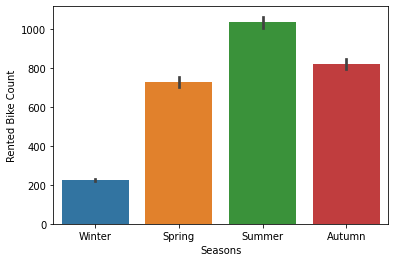

In [ ]:
# plotting seasons against count of rented bikes
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = df)


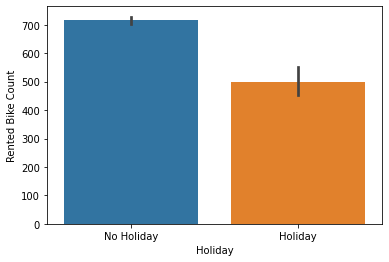

In [ ]:
# plotting Holiday against count of rented bikes
sns.barplot(x = 'Holiday', y = 'Rented Bike Count', data = df)


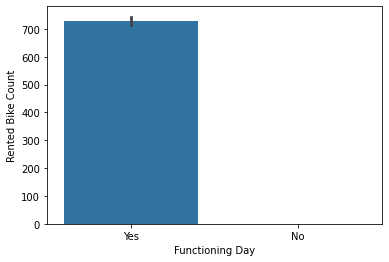

In [ ]:
# plotting Functioning Day against count of rented bikes
sns.barplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)

Text(0, 0.5, 'Count')

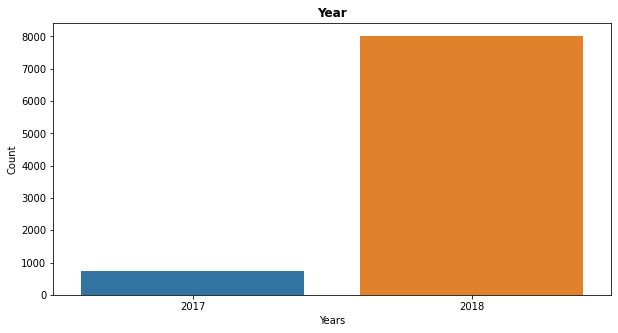

In [ ]:
#which year had more rents

plt.figure(figsize=(10,5))
ax = sns.countplot(x="year", data=df)
plt.title('Year',weight='bold')
plt.xlabel('Years')
plt.ylabel('Count')

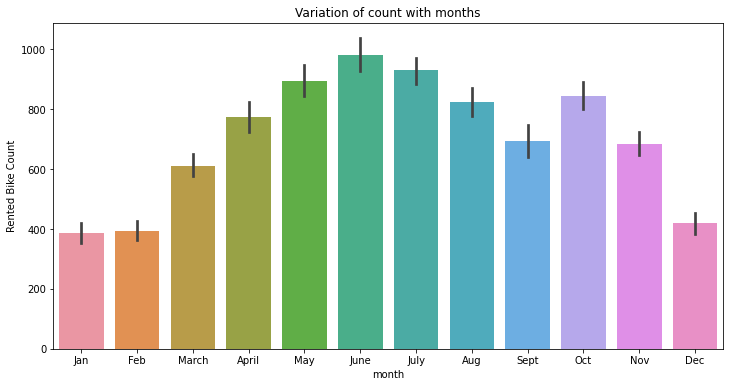

In [ ]:
#month 
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='Rented Bike Count', data=df)
ax.set_title('Variation of count with months')

tick_val=[0,1 , 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

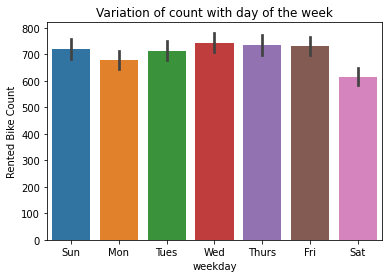

In [ ]:

#weekday
ax = sns.barplot(x="weekday",y='Rented Bike Count',data=df)
ax.set_title('Variation of count with day of the week')
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plt.xticks(tick_val, tick_lab)
plt.show()

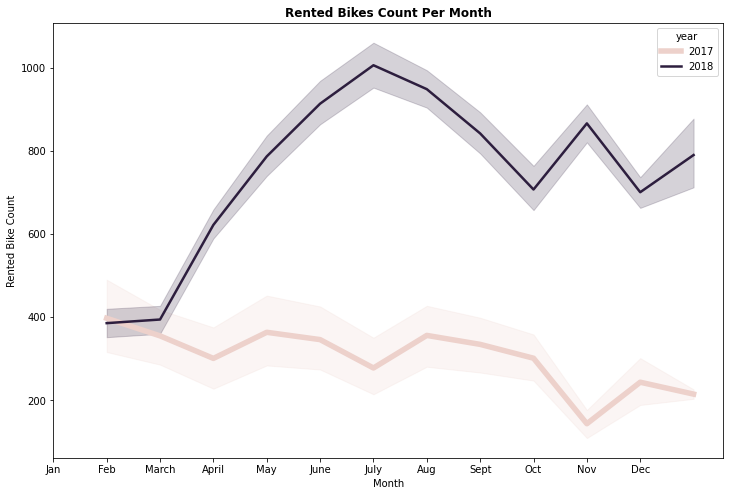

In [ ]:
#plot the new data into a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="Rented Bike Count", hue="year", data=df, 
              size='year', sizes=(5.5, 2.5))
plt.title("Rented Bikes Count Per Month",weight ='bold')
plt.xlabel("Month")
tick_val=[0,1 , 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.ylabel("Rented Bike Count")
plt.show()

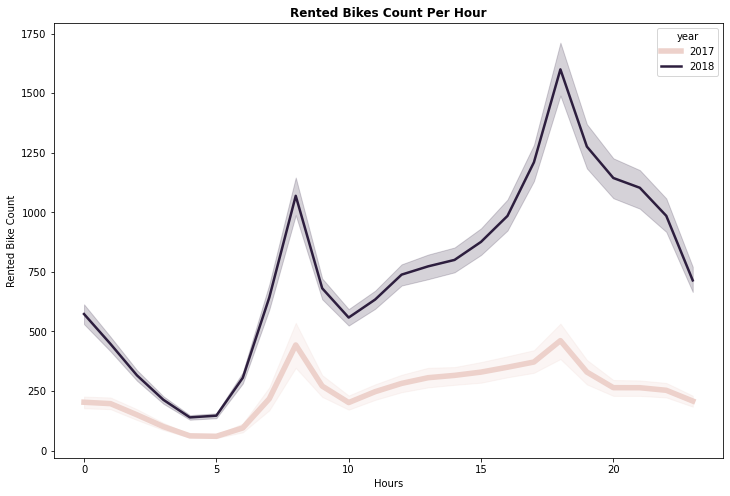

In [ ]:
#hour and bike count
plt.figure(figsize=(12, 8))
sns.lineplot(x = "Hour", y="Rented Bike Count", hue="year", data=df, 
              size='year', sizes=(5.5, 2.5))
plt.title("Rented Bikes Count Per Hour",weight ='bold')
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.show()

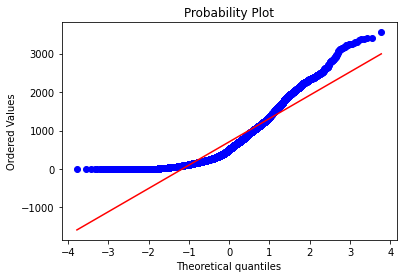

In [ ]:
#dependent variable is Rented Bike count:
#to check any outliers, and distribution of this variable.
from scipy import stats
plt = stats.probplot(df['Rented Bike Count'], plot=sns.mpl.pyplot)

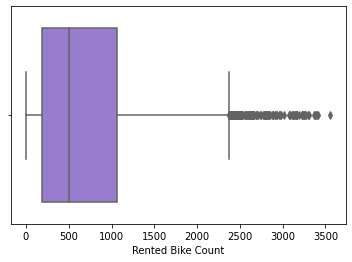

In [ ]:
sns.boxplot(x = 'Rented Bike Count', data = df, color = 'mediumpurple')


In [ ]:
#calculate the number of outliers:
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3-Q1
outliers = df[(df['Rented Bike Count'] < (Q1 - 1.5 * IQR)) | (df['Rented Bike Count'] > (Q3 + 1.5 * IQR))]
# print((len(outliers)/len(df))*100)
print(outliers)

            Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
2946  02/04/2018               2401    18  ...   Spring  No Holiday              Yes
2994  04/04/2018               2402    18  ...   Spring  No Holiday              Yes
3114  09/04/2018               2401    18  ...   Spring  No Holiday              Yes
3210  13/04/2018               2404    18  ...   Spring  No Holiday              Yes
3282  16/04/2018               2692    18  ...   Spring  No Holiday              Yes
...          ...                ...   ...  ...      ...         ...              ...
7746  19/10/2018               2631    18  ...   Autumn  No Holiday              Yes
7818  22/10/2018               2613    18  ...   Autumn  No Holiday              Yes
7842  23/10/2018               2415    18  ...   Autumn  No Holiday              Yes
7866  24/10/2018               2612    18  ...   Autumn  No Holiday              Yes
7890  25/10/2018               2632    18  ...   Autumn  No Holid

This says that 1.8% are above Q3+1.5 which are the outliers.


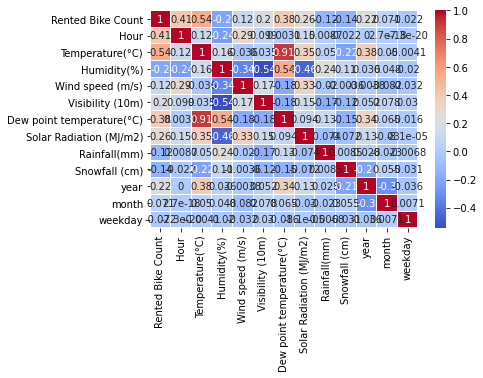

In [ ]:

df1 = df.corr()

sns.heatmap(df1, annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)

Categorical variable Conversion



In [ ]:
df = pd.get_dummies(df, columns=['Seasons','Holiday','Functioning Day'], prefix=["season",'hol','fnc'])

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),season_Autumn,season_Spring,season_Summer,season_Winter,hol_Holiday,hol_No Holiday,fnc_No,fnc_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1


Identify the dependent and independent variable

In [ ]:
#check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = feature_x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(feature_x.values, i)
                          for i in range(len(feature_x.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                    feature       VIF
0                      Hour  1.210350
1           Temperature(°C)  5.215574
2               Humidity(%)  2.644038
3          Wind speed (m/s)  1.306187
4          Visibility (10m)  1.684926
5   Solar Radiation (MJ/m2)  1.948098
6              Rainfall(mm)  1.071746
7             Snowfall (cm)  1.124874
8                      year  1.889844
9                     month  1.601016
10                  weekday  1.006452
11            season_Autumn       inf
12            season_Spring       inf
13            season_Summer       inf
14            season_Winter       inf
15              hol_Holiday       inf
16           hol_No Holiday       inf
17                   fnc_No       inf
18                  fnc_Yes       inf


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


from the above table, it seems that Temperature, Humidity, Visiblity, Dew point, holiday,func day are highly correalted.

In [ ]:
 df.drop('Date',axis =1,inplace=True) #dropping because getting error while fitting the model

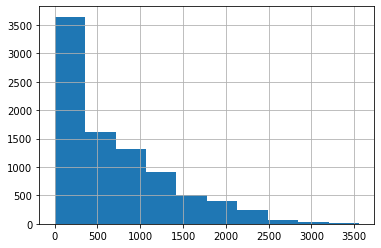

In [ ]:
target_y = df['Rented Bike Count']
# plotting the tragete variable to check its distribution
target_y.hist()

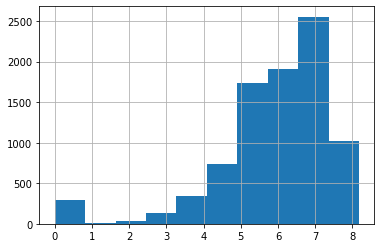

In [ ]:
# changing the right skewed to normal distribution.
target_y = np.log1p(target_y)
target_y.hist()

In [ ]:
# Independent variable
feature_x=df.drop('Rented Bike Count', axis = 1, inplace = False)
feature_x

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),season_Autumn,season_Spring,season_Summer,season_Winter,hol_Holiday,hol_No Holiday,fnc_No,fnc_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,0,1,0,1


Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size = 0.20, random_state = 0)

Choose a model :

1.Linear Regression.

2.Decison Tree.

3.Decsion Tree with GridSearch CV.

4.Random Forest Regressor.

1.Linear Regression as base model

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7894560757435654

In [ ]:
reg.coef_

array([ 4.09743390e-02, -3.14439766e-02, -3.73415545e-02, -1.52161920e-02,
       -4.69103876e-06,  7.86247035e-02, -7.70174354e-03, -1.97813476e-01,
       -1.99171603e-02, -2.96021598e-01,  2.25372036e-04, -1.21194390e-02,
       -2.96523814e-01, -2.83853248e-01, -8.87313769e-01,  3.77327175e-01,
        6.49537451e+00])

In [ ]:
reg.intercept_

598.8591937982435

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([6.07360064, 7.00471483, 5.52316604, ..., 6.78846753, 5.6146665 ,
       5.79553513])

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([5.53857067, 6.18307368, 5.45019252, ..., 5.08213022, 6.84347246,
       5.82145067])

In [ ]:
reg.score(X_test, y_test)

0.803651791758375

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_test)
print("r2_score :" , r2)
MSE  = mean_squared_error((y_test),(y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_score : 0.8076225040393095
MSE : 0.5154462839524518
RMSE : 0.7179458781499145


2.Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=4,                       
                           min_samples_split=5,
                           max_leaf_nodes=10)


In [ ]:
decision_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
model = decision_tree.fit(X_train,y_train) #drop date column to make this run because date cannot be interepreted as an integer.

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([5.95642931, 5.95642931, 5.55207303, ..., 5.95642931, 7.03287549,
       5.95642931])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.5154462839524518
RMSE : 0.7179458781499145


In [ ]:
decision_tree.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(decision_tree.score(X_test,y_test)))

R-Squared on test dataset=0.8235625151075846


Decison Tree Visualization

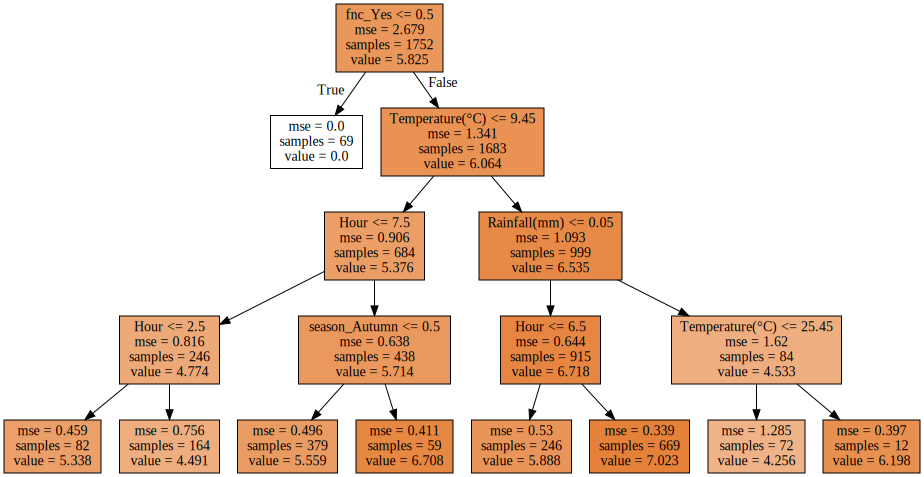

In [ ]:
# Visualizing the tree :
# Trying to get the picture of decison tree (Incomplete)
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=list(feature_x.columns),  
                                class_names=target_y,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

3.Decison Tree - Hyperparameter tuning with GridSearchCV

In [ ]:
# Finding best parameters for decision tree
tree_regg = DecisionTreeRegressor(random_state=0)
tree_param = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

In [ ]:

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(tree_regg,tree_param,cv=3)
grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
tree_regg =DecisionTreeRegressor(max_depth=best_param['max_depth'],min_samples_leaf= best_param['min_samples_leaf'])
model = tree_regg.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.27065563683158056
RMSE : 0.5202457465771158


In [ ]:
print("R-Squared on train dataset={}".format(tree_regg.score(X_train,y_train)))
print("R-Squared on test dataset={}".format(tree_regg.score(X_test,y_test)))


R-Squared on train dataset=0.9528924379685562
R-Squared on test dataset=0.8989845202063604


4.Random Forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor.
forest = RandomForestRegressor()           
# n_estimators = number of trees in the foreset
n_estimators = [500]    

# max_features = max number of features considered for splitting a node:
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# # If “log2”, then max_features=log2(n_features).
max_features = ["auto",'sqrt','log2']

#applying grisd search on forest:
# Specify the grid serach params
grid_search_forest = {'n_estimators' : n_estimators, 'max_features' : max_features}
#grid search
rand_search_forest = GridSearchCV(forest, grid_search_forest, cv = 4, 
                                         refit = True, n_jobs = -1, verbose=2)

rand_search_forest.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
random_estimator = rand_search_forest.best_estimator_

y_pred_train= random_estimator.predict(X_train)

In [ ]:
rf_mse = mean_squared_error(y_train, y_pred_train)
rf_rmse = np.sqrt(rf_mse)
print("Mean_Square_error is : " ,rf_mse)
print("Root Mean_Square_error is : " ,rf_rmse)

Mean_Square_error is :  0.27066204328580956
Root Mean_Square_error is :  0.5202519036830231


In [ ]:
random_estimator = rand_search_forest.best_estimator_

y_pred_rf= random_estimator.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Mean_Square_error is : " ,rf_mse)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean_Square_error is : " ,rf_rmse)

Mean_Square_error is :  0.36654062953449384
Root Mean_Square_error is :  0.6054259901379307


In [ ]:
r2_score = (random_estimator.score(X_test,y_test))
print("R Squared is : " ,r2_score)

R Squared is :  0.8631978332698471


Feature selection 1

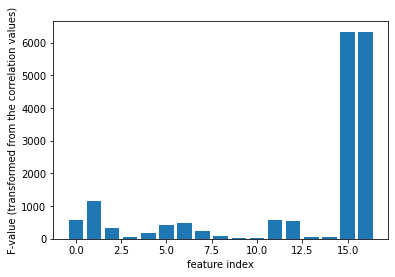

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

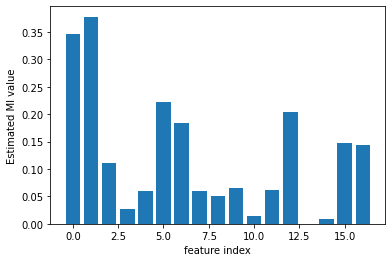

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

Model Selection

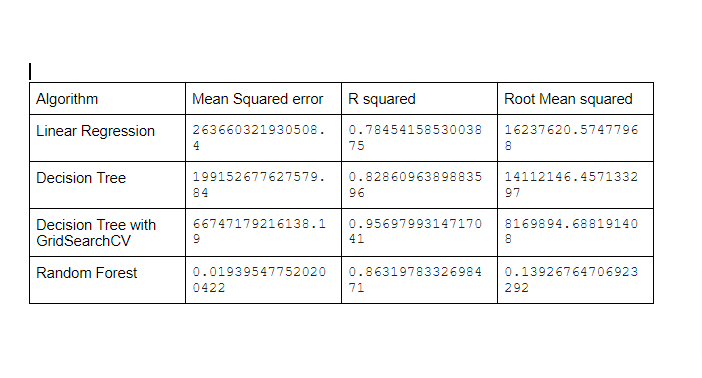

In [ ]:
#Evalution on the basis of r2_Score

data = [['LR', 0.7845415853003875], ['DT',0.8286096389883596 ], ['DT_GS', 0.9569799314717041],['RF_GS', 0.8631978332698471]]
r2 = pd.DataFrame(data, columns = ['Algorithms', 'R2_Score'])

In [ ]:
r2

,Algorithms,R2_Score
0,LR,0.784542
1,DT,0.828610
2,DT_GS,0.956980
3,RF_GS,0.863198


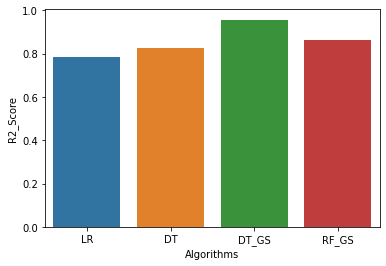

In [ ]:
sns.barplot(x = 'Algorithms', y = 'R2_Score', data = r2)

In [ ]:
#Evalution on the basis of Mean square error

data = [['LR', 263660321930508.4], ['DT',199152677627579.84 ], ['DT_GS', 66747179216138.19],['RF_GS', 0.019395477520200422]]
mse = pd.DataFrame(data, columns = ['Algorithms', 'MSE'])

In [ ]:
mse

,Algorithms,MSE
0,LR,2.636603e+14
1,DT,1.991527e+14
2,DT_GS,6.674718e+13
3,RF_GS,1.939548e-02


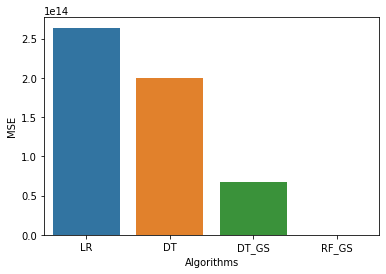

In [ ]:
sns.barplot(x = 'Algorithms', y = 'MSE', data = mse)